<a href="https://colab.research.google.com/github/Manojgharge07/Machine_Learning_Data_Science/blob/main/ML_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

In [12]:
#import Some libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [13]:
#load the dataset:
df = pd.read_csv('/content/drive/MyDrive/All CSV files/train_E6oV3lV.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [14]:
#dimension of dataset:
df.shape

(31962, 3)

In [15]:
#checking info our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [16]:
#checking null values in our data:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [17]:
df[df['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [18]:
df[df['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [19]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

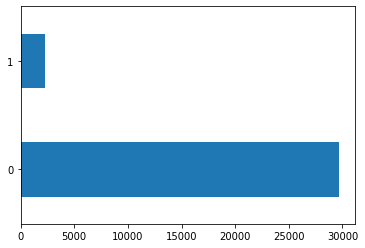

In [20]:
df['label'].value_counts()[:20].plot(kind='barh')

In [21]:
#remove pattern in the input text:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i,"",input_txt)
  return input_txt

In [22]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [23]:
#remove twitter handel(@user):
df['clean_tweet']= np.vectorize(remove_pattern)(df['tweet'],'@[\w]*')

In [24]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [25]:
#remove special charactors, numbers and punctuations:
df['clean_tweet'] = df['clean_tweet'].str.replace('[^a-zA-Z#]',' ')
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [26]:
#remove short word:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [27]:
#indvidual words consider as tokens:
tokenize_tweet = df['clean_tweet'].apply(lambda x : x.split())
tokenize_tweet.head() 

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [28]:
 #stem the word:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenize_tweet = tokenize_tweet.apply(lambda x: [stemmer.stem(word) for word in x])
tokenize_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [29]:
#combine words into single sentence:
for i in range(len(tokenize_tweet)):
  tokenize_tweet[i] = ' '.join(tokenize_tweet[i])
df['clean_tweet'] = tokenize_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# **Exploratory data analysis**

In [30]:
!pip install Wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


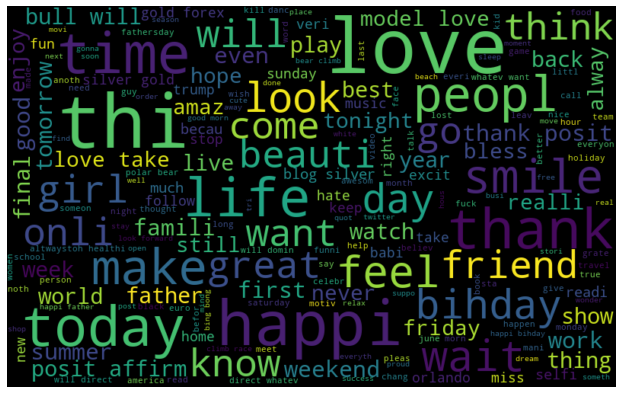

In [31]:
#display the frequent words:
all_words = ' '.join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

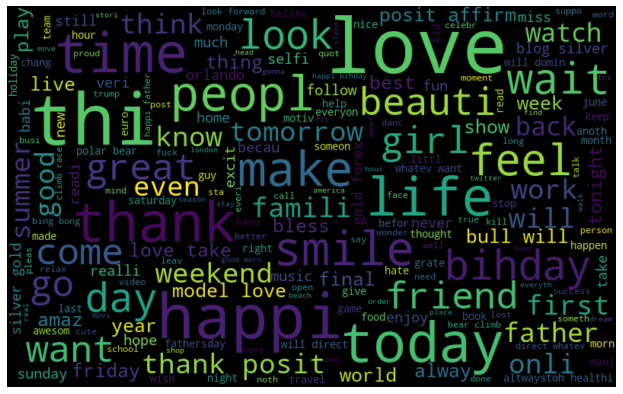

In [32]:
#frequent words displayed for positive:
all_words = ' '.join([sentence for sentence in df['clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

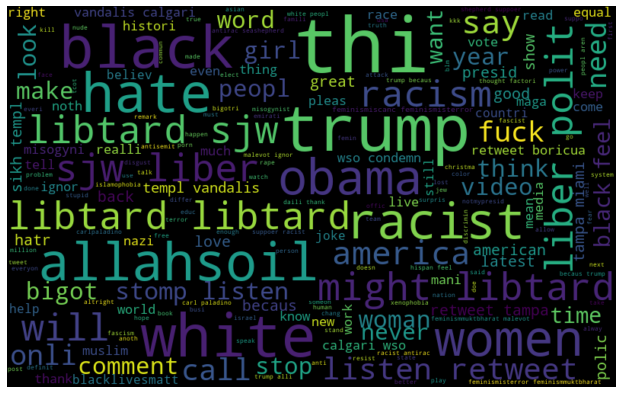

In [33]:
#frequent words displayed for negative:
all_words = ' '.join([sentence for sentence in df['clean_tweet'][df['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

In [34]:
#extract the hashtag:
def hashtag_extract(tweets):
  hashtags = []
  #loop words in the tweet
  for tweet in tweets:
    ht = re.findall(r'#(\w+)', tweet)
    hashtags.append(ht)
  return hashtags

In [35]:
#extract hashtags  from non racist tweets;
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

#extract hashtags  from non racist tweets;
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [36]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [37]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [38]:
#unnest list:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [39]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [40]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [41]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


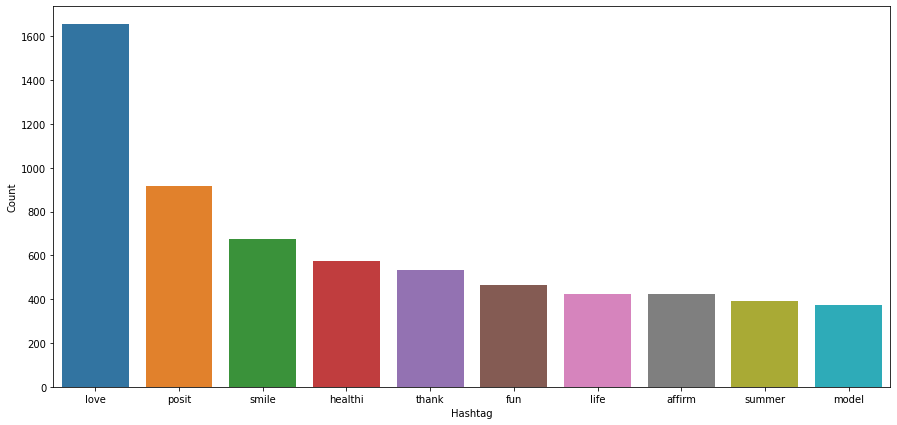

In [42]:
#select top 10 hashtags;
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,7))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [43]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


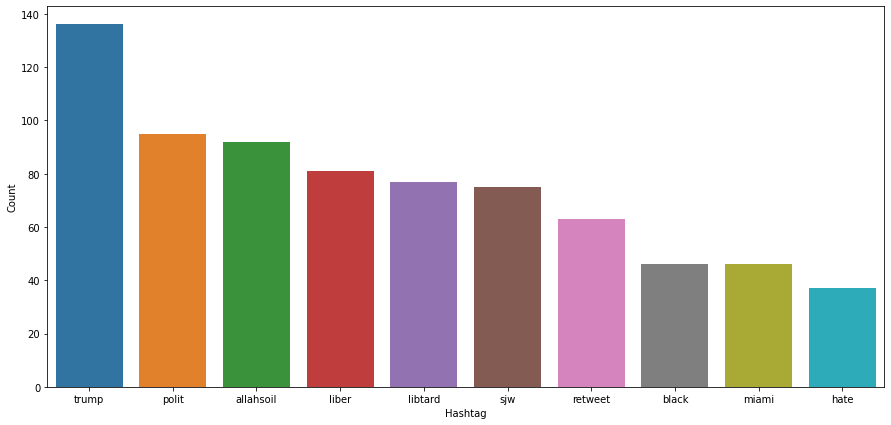

In [44]:
#select top 10 hashtags;
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,7))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

# **Input split**

In [45]:
#feature exytaction:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizre = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizre.fit_transform(df['clean_tweet'])

In [46]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 124813 stored elements in Compressed Sparse Row format>

In [47]:
bow[0]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [48]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state = 42, test_size = 0.25)

# **Model training**

In [50]:
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import f1_score, accuracy_score

In [51]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
#testing:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [53]:
accuracy_score(y_test, pred)

0.9469403078463271

In [54]:
#use probability for output:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5545722713864307

In [55]:
accuracy_score(y_test, pred)

0.9433112251282693

In [56]:
pred_prob[0]

array([0.99896464, 0.00103536])

In [57]:
pred_prob[0][1]

0.0010353625510300382

In [58]:
pred_prob[0][1] >= 0.3

False

Result false means it is Zero.

In [59]:
from sklearn import tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import f1_score, accuracy_score

In [61]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
#testing:
pred1 = model.predict(x_test)
f1_score(y_test, pred1)

0.4889267461669506

In [63]:
accuracy_score(y_test, pred1)

0.9249155299712176

In [64]:
#use probability for output:
pred_prob = model.predict_proba(x_test)
pred1 = pred_prob[:, 1] >= 0.3
pred1 = pred1.astype(np.int)

f1_score(y_test, pred1)

0.4567567567567568

In [65]:
accuracy_score(y_test, pred1)

0.8993868101614316

In [66]:
pred_prob[0][1] >= 0.3

False

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from  sklearn.metrics import f1_score, accuracy_score

In [68]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [69]:
#testing:
pred2 = model.predict(x_test)
f1_score(y_test, pred2)

0.5639589169000934

In [70]:
accuracy_score(y_test, pred2)

0.941559254160931

In [71]:
#use probability for output:
pred_prob = model.predict_proba(x_test)
pred2 = pred_prob[:, 1] >= 0.3
pred2 = pred2.astype(np.int)

f1_score(y_test, pred2)

0.5126498002663116

In [72]:
accuracy_score(y_test, pred2)

0.9083969465648855

In [73]:
pred_prob[0][1] >=0.3

False

In [74]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [76]:
#testing:
pred3 = model.predict(x_test)
f1_score(y_test, pred3)

0.42456608811749

In [77]:
accuracy_score(y_test, pred3)

0.946064322362658

In [78]:
#use probability for output:
pred_prob = model.predict_proba(x_test)
pred3 = pred_prob[:, 1] >= 0.3
pred3 = pred3.astype(np.int)

f1_score(y_test, pred3)

0.4935064935064935

In [79]:
accuracy_score(y_test, pred3)

0.9463146039294206

In [80]:
pred_prob[0][1] >=0.3

False

Result false means it is Zero.